In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [51]:
df = pd.read_csv('train3.csv')
df.info(show_counts=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      516 non-null    float64
 1   x2      516 non-null    float64
 2   x3      516 non-null    float64
 3   x0      516 non-null    float64
 4   x4      516 non-null    int64  
 5   x5      516 non-null    float64
 6   x6      516 non-null    float64
 7   x7      516 non-null    float64
 8   x8      516 non-null    float64
 9   y       516 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 40.4 KB


(array([  8.,  24.,  51.,  75.,  65.,  33.,  14.,  36., 159.,  51.]),
 array([-4.21392576e+08, -3.60075453e+08, -2.98758330e+08, -2.37441206e+08,
        -1.76124083e+08, -1.14806960e+08, -5.34898368e+07,  7.82728640e+06,
         6.91444096e+07,  1.30461533e+08,  1.91778656e+08]),
 <BarContainer object of 10 artists>)

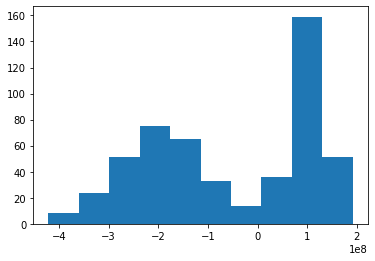

In [52]:
plt.hist(df.y)

(array([42., 44., 44., 67., 58., 54., 41., 50., 57., 59.]),
 array([8.10169950e-02, 1.00538273e+01, 2.00266376e+01, 2.99994479e+01,
        3.99722582e+01, 4.99450685e+01, 5.99178788e+01, 6.98906891e+01,
        7.98634994e+01, 8.98363097e+01, 9.98091200e+01]),
 <BarContainer object of 10 artists>)

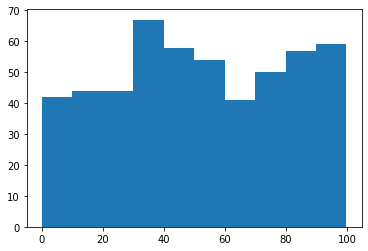

In [53]:
plt.hist(df.x1)

(array([ 11.,  26.,  41.,  97., 110., 123.,  58.,  35.,  13.,   2.]),
 array([-81.257637 , -61.6919513, -42.1262656, -22.5605799,  -2.9948942,
         16.5707915,  36.1364772,  55.7021629,  75.2678486,  94.8335343,
        114.39922  ]),
 <BarContainer object of 10 artists>)

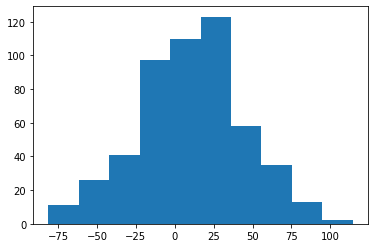

In [54]:
plt.hist(df.x2)

(array([  2.,   4.,  12.,  43.,  90., 130., 115.,  81.,  33.,   6.]),
 array([-134.97499 , -109.676902,  -84.378814,  -59.080726,  -33.782638,
          -8.48455 ,   16.813538,   42.111626,   67.409714,   92.707802,
         118.00589 ]),
 <BarContainer object of 10 artists>)

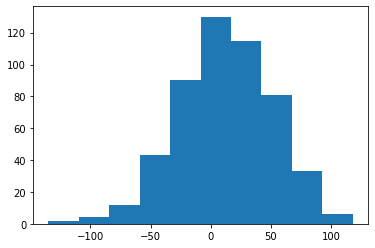

In [55]:
plt.hist(df.x3)

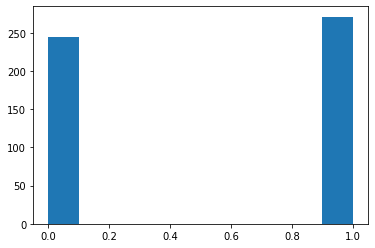

In [56]:
plt.hist(df.x4) #ummm i think im going to drop this
df = df.drop(columns=['x4'])

(array([ 76., 147.,  24.,  16.,  30.,  58.,  69.,  56.,  31.,   9.]),
 array([-87.764595 , -58.7858865, -29.807178 ,  -0.8284695,  28.150239 ,
         57.1289475,  86.107656 , 115.0863645, 144.065073 , 173.0437815,
        202.02249  ]),
 <BarContainer object of 10 artists>)

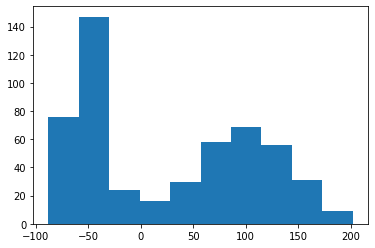

In [57]:
plt.hist(df.x5)

In [58]:
#break up df into x and y
vars = ['x0','x1','x2','x3','x5','x6','x7','x8']
x = df[vars]
y = df['y']

0      -74025800.0
1     -167792768.0
2      136613888.0
3     -285234944.0
4     -145910784.0
          ...     
511   -304732704.0
512     92312536.0
513     88497136.0
514     93397440.0
515   -283547264.0
Name: y, Length: 516, dtype: float64

In [59]:
#scale dataset
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)


ValueError: Expected 2D array, got 1D array instead:
array=[-7.40258000e+07 -1.67792768e+08  1.36613888e+08 -2.85234944e+08
 -1.45910784e+08 -3.00894496e+08  1.08029660e+07 -1.72103616e+08
 -2.07246080e+08  1.02577088e+08  4.34051600e+07  1.15853112e+08
  7.04643680e+07 -2.21787984e+08  1.46623952e+08  2.83221600e+07
 -2.00103504e+08  7.48022720e+07 -2.60133216e+08  1.31845000e+08
 -2.27148480e+08  1.31537160e+08 -1.07413360e+08 -1.38362848e+08
 -3.63126528e+08 -2.15877760e+07 -1.97495200e+08 -6.22670960e+07
  1.46871872e+08 -2.84040360e+07  1.35882624e+08  1.48137536e+08
  8.27746640e+07  6.02418880e+07 -2.22794960e+08  1.43940976e+08
  1.10729544e+08 -2.61504192e+08  1.28667312e+08  1.00854008e+08
 -1.58264752e+08  1.27563520e+08 -8.46226640e+07 -1.44204624e+08
 -2.06785008e+08 -1.82709040e+08 -4.21392576e+08  1.08501392e+08
  1.24290024e+08  1.03603384e+08  9.38360560e+07  1.08136808e+08
 -3.39282944e+08 -2.46172656e+08 -9.04519840e+07 -2.37283136e+08
 -3.11749536e+08 -2.55134032e+08 -5.45792600e+07  1.86258440e+07
 -2.03072832e+08 -2.05724416e+08  1.76210288e+08  7.58994880e+07
 -1.60537648e+08  8.79801040e+07  1.09186320e+08  9.71684320e+07
  1.18212232e+08 -1.54269328e+08 -2.18777152e+08 -3.58144800e+07
  7.06793120e+07 -9.78609520e+07  8.97361600e+07 -1.96643472e+08
 -3.69629280e+07  1.23131104e+08  7.32901040e+07 -6.19790000e+06
 -2.75904416e+08 -1.36277440e+08  6.82330400e+07  9.79210000e+07
  8.47843360e+07 -2.70600704e+08 -2.92721600e+08 -2.53201168e+08
  4.85319400e+07  1.12175992e+08  1.59376256e+08  1.05630464e+08
 -3.20389760e+08 -2.94106784e+08  1.41090176e+08 -2.45689568e+08
  8.58195680e+07 -4.16616992e+08  1.32264792e+08  7.90296000e+07
  1.34420944e+08 -8.19023920e+07  8.97063600e+07 -3.41544416e+08
 -3.99337088e+08  8.08676240e+07  7.99612560e+07 -2.66655840e+08
 -1.37032576e+08 -2.01867360e+08  6.11488680e+07  8.46689440e+07
  1.30417336e+08 -2.84928544e+08 -2.04221920e+08 -2.46378688e+08
  5.26533960e+07 -2.19306656e+08 -1.89102000e+08  1.91778656e+08
  7.89694480e+07 -1.46084656e+08 -2.80538144e+08 -2.58979056e+08
  1.35568128e+08  6.23621720e+07  8.96609100e+06  1.45302208e+08
 -1.65260896e+08 -4.08832064e+08 -1.44809904e+08  1.01645728e+08
  1.34131304e+08 -2.57834848e+08 -6.63773650e+06 -1.48396960e+08
  9.40765440e+07  1.51436192e+08 -1.49595552e+08  1.19525064e+08
  1.34687952e+08  1.16859168e+08  4.34081320e+07  1.06085136e+08
 -2.10356160e+08  1.41722912e+08 -1.79765984e+08 -3.03004096e+08
 -1.79295936e+08  1.02786456e+08 -2.74879616e+08  5.26077920e+07
  9.32918880e+07 -1.43864304e+08  1.12394208e+08 -2.35158912e+08
 -3.56169024e+08 -1.15001304e+08  1.24477408e+08 -2.06611152e+08
 -3.66193888e+08 -1.31688192e+08 -1.07950952e+08 -1.78329296e+08
  5.76382040e+07 -1.67074928e+08  1.06912936e+08 -1.80886256e+08
  1.45512832e+08 -1.89969888e+08  5.46217880e+07  9.15373360e+07
 -1.48457456e+08  1.36895376e+08 -3.49583296e+08  8.37505200e+07
 -9.21053040e+07 -2.81213280e+08 -2.32991600e+08 -2.50704960e+08
 -2.65253120e+08  5.75276320e+07 -3.57209200e+07  1.28828800e+08
  1.16978864e+08 -1.74665088e+08  3.88182520e+07 -1.57417728e+08
 -2.33608816e+08 -2.11114256e+08  1.34990896e+08 -2.14099248e+08
  9.96510000e+07 -1.51891968e+08  1.12877672e+08  8.49084240e+07
 -1.35079584e+08 -1.89021072e+08  1.20092992e+08  7.31384960e+07
  6.85465200e+07  5.60997880e+07  1.63479008e+08  6.71916320e+07
 -2.52709408e+08  1.32648752e+08  1.38037744e+08 -2.91649664e+08
 -7.14767920e+07 -2.09952400e+08  9.18679600e+07 -1.15762224e+08
  7.47273440e+07 -3.02687584e+08 -1.81986256e+08  8.49482240e+07
 -2.12358464e+08  7.48391760e+07  8.69026000e+07  7.31724800e+07
 -1.52155808e+08 -2.53616448e+08 -1.26934072e+08  1.70827376e+08
 -3.23470688e+08 -1.20422136e+08 -3.63802848e+08  1.34125480e+08
 -1.61230256e+08  7.64490720e+07  6.93698480e+07 -3.20804060e+07
  8.19569200e+07 -1.32681856e+08 -1.43425424e+08 -1.02903384e+08
 -1.95582704e+08  1.10638920e+08 -1.96815712e+08 -2.49333856e+08
 -1.45192880e+08 -5.99342200e+07 -2.29827296e+08 -1.20562960e+08
 -1.48078688e+08 -1.99237888e+08 -3.56563488e+08  1.34131616e+08
  8.55458240e+07  1.35966224e+08  1.53133376e+08 -1.35661712e+08
  1.48412544e+08 -9.47560320e+07  5.04250040e+07 -9.25171680e+07
  6.64665840e+07 -2.42175024e+08 -1.63830896e+08 -1.74131728e+08
  1.51929792e+08 -2.82604064e+08  1.05942840e+08 -2.68620000e+08
 -2.57005000e+07 -2.27911552e+08 -9.94814000e+07  8.93793680e+07
  1.25906656e+08 -2.68257504e+08 -1.94527312e+08  1.74004928e+08
 -2.03671008e+08 -1.49225856e+08 -1.46294544e+08 -2.23386704e+08
  3.57450720e+07  1.31660560e+08 -1.01030024e+08  1.04918368e+08
 -9.95480640e+07 -1.31442728e+08  9.71772160e+07 -1.04201160e+08
  1.12603816e+08 -2.77709536e+08 -2.19539152e+08 -2.35445648e+08
 -2.67991264e+08 -2.08449440e+08 -1.70211904e+08  1.00356536e+08
  1.04357424e+08  1.12518000e+08 -2.52216960e+08  7.67496000e+07
  6.13266360e+07 -3.42495712e+08  7.39067440e+07 -7.29352480e+07
 -1.96640400e+08 -3.07595360e+08 -2.41744144e+08 -1.74325776e+08
  7.57162160e+07  1.28950448e+08  1.29913952e+08 -1.00180240e+08
 -1.37130160e+08 -4.49607160e+07 -1.92728816e+08 -1.79457152e+08
 -1.43631872e+08 -1.97570576e+08  1.07694232e+08 -2.90840320e+08
 -3.22612480e+08 -2.03304768e+08  1.50586400e+08  9.65841840e+07
  1.49059680e+08 -1.83884432e+08  9.18609760e+07  9.52060800e+07
  1.37735616e+08  1.22581760e+08 -3.34102144e+08 -1.48338272e+08
 -2.12761632e+08 -2.88692192e+08  1.00734152e+08  1.09768968e+08
 -2.07494944e+08  1.10492640e+08 -2.41858576e+08  1.43868768e+08
  9.52484400e+07 -1.36278432e+08  9.12238480e+07  1.04001800e+08
 -1.08236496e+08  8.90445520e+07 -1.14260880e+08  1.36859168e+08
 -1.48272784e+08 -1.65961024e+08  1.25732080e+08 -2.51627040e+08
  1.59746320e+08  6.87067440e+07 -2.86117664e+08  8.59161120e+07
 -1.50774144e+08  8.36941440e+07 -5.91599960e+07  9.51745600e+07
 -2.38739888e+08 -2.72382080e+08  1.21818512e+08 -2.25026096e+08
 -2.35557696e+08 -2.45681072e+08  5.61931200e+07 -2.59810176e+08
 -2.89228864e+08  1.15550088e+08 -6.88225920e+07  7.14147200e+07
 -7.13407280e+07  8.47582800e+07 -2.63863296e+08  9.55817360e+07
 -1.90274304e+08 -1.99584800e+08  1.16430608e+08  3.07031720e+07
 -1.20391992e+08  9.38394640e+07  8.58563840e+07 -1.12415384e+08
  1.06191176e+08 -2.02029968e+08  5.06656450e+06  1.24423224e+08
  1.02074992e+08 -1.90118128e+08 -3.03586848e+08  1.23998960e+08
  1.26775352e+08  1.32846192e+08 -1.82262880e+08  2.73889000e+07
  9.49193120e+07  6.72559440e+07  1.27706776e+08 -2.72785248e+08
  9.61821040e+07 -2.99903552e+08  1.03201584e+08  1.12985336e+08
 -2.16867296e+08  9.64367200e+07  6.31138000e+07  1.00268344e+08
 -3.65711744e+08  5.35923560e+07 -3.11498432e+08  5.26809400e+07
 -1.96778400e+08  1.69882368e+08  1.31727216e+08 -1.22747184e+08
 -1.98694832e+08  1.12300392e+08 -1.43704384e+08  9.80310480e+07
 -9.77451680e+07 -2.52050704e+08 -1.35804464e+08  1.15062400e+08
 -2.59920304e+08  1.14492112e+08  7.86826160e+07 -9.86614160e+07
  1.01778432e+08 -1.48467856e+08 -2.00407920e+08  1.14540528e+08
 -2.94160320e+08  1.10892432e+08  1.38533072e+08  8.04159680e+07
 -6.86853840e+07 -3.17091872e+08 -1.43828304e+08  7.96329280e+07
  1.14419016e+08 -1.55007312e+08 -1.94974384e+08 -1.71732620e+07
  8.15321120e+07  1.02323792e+08  1.48672000e+08 -2.24673616e+08
 -2.32269824e+08 -1.06593912e+08 -1.67620560e+08  1.06015904e+08
  1.09401152e+08  9.22515840e+07 -1.00566190e+07  1.10567024e+08
 -1.52853920e+08  1.01554912e+08  9.05261280e+07  1.39714816e+08
 -1.78402256e+08  9.88702880e+07 -3.03501056e+08  1.45431232e+08
 -5.04440920e+07 -3.47659872e+08 -1.78303968e+08  1.21996208e+08
 -1.50310784e+08  1.02154136e+08 -2.08564112e+08  1.06686776e+08
  8.94267760e+07  6.74006240e+07 -2.61259184e+08  7.86881280e+07
  8.62751520e+07 -3.27005376e+08 -1.87276752e+08 -1.65697552e+08
  1.24881392e+08 -1.41941936e+08  6.96364400e+07  8.66753760e+07
  8.29491360e+07  1.02449176e+08 -1.29959872e+08  1.65264368e+08
  5.97728360e+07  9.64251040e+07 -1.49844912e+08  1.54373232e+08
  1.15196528e+08  7.76246480e+07 -3.53731264e+08  8.42688960e+07
 -1.59194000e+08 -1.82551168e+08  4.74730320e+07  1.40260064e+08
  9.66422640e+07 -1.82856048e+08 -1.43382912e+08 -2.51609856e+08
 -9.45374960e+07 -2.35889664e+08 -2.12320848e+08  9.08558240e+07
  9.44484320e+07  1.04978056e+08 -2.25522592e+08  7.97633840e+07
  5.20242640e+07  1.05417640e+08 -8.37760240e+07 -3.04732704e+08
  9.23125360e+07  8.84971360e+07  9.33974400e+07 -2.83547264e+08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.